# Assignment 2

(๑• .̫ •๑)

Your last pokemon adventure went well, but you aren't quite the very best like no one ever was. Faithful to your data scientist ways, you decide to further analyse your pokedex to improve your training.

The data can be found under `pokedex/pokemons.csv`, and is the same as assignment 1. Run the cell below to get an overview of the dataset:

In [1]:
import pandas as pd
import numpy as np

df = pd.read_csv('pokedex/pokemons.csv')
df.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


## Problem 1

Analysing and grouping "smart" pokemons by `Type 1` wasn't very successful last assignment: we got a headache from trying to train a Psyduck. Since then however, we learnt a powerful unsupervised learning method for analysing **clusters** in our datasets.

💪 **Task: Use k-Means clustering to find 4 clusters in the pokemon dataset, and store the predictions in a vector called `y_kmeans`.**  
Pro-tip 1: You should only take into account the `Attack`, `Defense`, `Sp. Atk`, `Sp. Def`, `Speed`, and `HP` columns.  
Pro-tip 2: Please use the `random_state=42` argument when constructing your sklearn class, to make sure your results are reproducible. Marks won't be taken off for using the wrong random seed, but the unit tests won't pass!  
Pro-tip 3: We have seen in lectures that sklearn expects NumPy `ndarray`s as argument to its training and prediction methods. Whilst that is true, it can also accept pandas `DataFrame`s directly, since these are `ndarray` wrappers. You can use whichever you prefer.

In [2]:
#Importing K Means Clustering Algorithm from the sklearn library.
from sklearn.cluster import KMeans

#Making a new dataframe 'STATS' as per required criteria from our original dataframe 'DF'.
stats = df[['HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed']]

#Training our model for making '4 CLUSTERS' of a '42 RANDOM SEED'.
kmeans = KMeans(n_clusters=4, random_state=42)

#Converting 'STATS' dataframe into a NumPy array and fitting it into the trained model.
kmeans.fit(stats.to_numpy())

#Getting a predicted output from our trained model and storing it in 'Y_KMEANS'.
y_kmeans = kmeans.predict(stats)
y_kmeans

array([1, 2, 2, 3, 1, 2, 2, 3, 3, 1, 2, 2, 3, 1, 1, 2, 1, 1, 2, 2, 1, 1,
       2, 3, 1, 2, 1, 2, 1, 2, 1, 2, 1, 0, 1, 1, 2, 1, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 2, 1, 0, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 3, 1,
       1, 2, 1, 2, 2, 3, 1, 2, 0, 1, 2, 2, 1, 2, 1, 0, 0, 2, 2, 1, 0, 0,
       1, 2, 1, 1, 2, 1, 2, 1, 2, 1, 0, 1, 2, 2, 3, 0, 1, 2, 1, 0, 1, 2,
       1, 2, 1, 0, 2, 0, 1, 1, 0, 1, 0, 2, 2, 2, 3, 1, 2, 1, 2, 1, 2, 2,
       2, 2, 2, 2, 0, 3, 2, 1, 2, 3, 2, 1, 1, 2, 2, 3, 2, 1, 0, 1, 0, 2,
       3, 2, 3, 3, 3, 1, 2, 3, 3, 3, 3, 3, 1, 2, 2, 1, 2, 2, 1, 2, 2, 1,
       2, 1, 2, 1, 2, 1, 1, 2, 1, 2, 1, 1, 1, 1, 2, 1, 2, 1, 1, 2, 3, 0,
       1, 2, 0, 2, 1, 1, 2, 1, 1, 2, 2, 1, 0, 2, 0, 2, 2, 2, 1, 2, 2, 1,
       0, 2, 0, 0, 0, 1, 2, 2, 0, 0, 0, 2, 0, 2, 1, 2, 1, 0, 1, 2, 1, 1,
       2, 1, 2, 0, 1, 2, 3, 2, 1, 0, 2, 2, 1, 1, 0, 1, 1, 1, 2, 2, 3, 3,
       0, 1, 2, 3, 3, 3, 3, 3, 1, 2, 2, 3, 1, 2, 3, 3, 1, 2, 2, 3, 1, 2,
       1, 2, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 2, 1, 2,

In [3]:
def test_kmeans():
    assert len(y_kmeans) == 800, f'The size of your prediction vector is wrong: {len(y_kmeans)}. There should be 800, one per pokemon.'
    unique_clusters = len(np.unique(y_kmeans))
    assert unique_clusters == 4, f'There should 4 unique clusters, your prediction vector has {unique_clusters}'
    assert y_kmeans.mean() == 1.5025, f'Something is not quite right with your prediction vector. Have you used a random seed of 42?'
    print('Success! 🎉')
    return

test_kmeans()

Success! 🎉


## Problem 2

Now that we have clustered our pokemons, we'd like to explore these groups. Specifically, we'd like to know the mean stats of each cluster, so we can compare their average strengths and weaknesses.


💪 **Task: Group the pokemons by cluster, and calculate the mean statistics of each group. Save this in a `DataFrame` called `cluster_means`. For example, you should be able to clearly read the average `Defense` of cluster 2 in your `cluster_means` `DataFrame`.**   
Pro-tip 1: Adding a `Cluster` column to `df` will allow you to work on a single `DataFrame` and make the task much easier 🙃  
Pro-tip 2: You should only expect numerical columns in `cluster_means`, since the mean of a string is undefined.

In [4]:
#Appending our Dataframe with a 'CLUSTER' column with the predicted data of our clusters.
df.loc[:, 'Cluster'] = y_kmeans.copy()

In [5]:
#Grouping the Pokemons on the basis of their 'CLUSTER'.
cluster_means = df.groupby('Cluster').mean()
cluster_means.head()

,#,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
Cluster,,,,,,,,,,
0,395.460870,490.139130,71.304348,92.913043,121.426087,63.895652,88.234783,52.365217,3.513043,0.060870
1,348.159574,302.528369,50.244681,54.081560,51.634752,47.631206,49.117021,49.819149,3.294326,0.000000
2,347.858131,468.993080,79.131488,81.176471,69.124567,82.159170,77.470588,79.930796,3.252595,0.000000
3,404.043860,621.614035,89.201754,121.096491,92.736842,120.456140,97.675439,100.447368,3.385965,0.508772


In [6]:
import math

def test_cluster_means():
    assert len(cluster_means) == 4, f'Your dataframe has {len(cluster_means)} rows, but 4 are expected: one per cluster'
    assert 'Attack' in cluster_means.columns, f'Your dataframe should contain the Attack column'
    assert math.isclose(cluster_means.values.sum(), 5276.0872, rel_tol=1e-5), f'Something is not quite right with your cluster means. Have you used a random seed of 42?'
    print('Success! 🎉')
    return cluster_means
    
test_cluster_means()

Success! 🎉


,#,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
Cluster,,,,,,,,,,
0,395.460870,490.139130,71.304348,92.913043,121.426087,63.895652,88.234783,52.365217,3.513043,0.060870
1,348.159574,302.528369,50.244681,54.081560,51.634752,47.631206,49.117021,49.819149,3.294326,0.000000
2,347.858131,468.993080,79.131488,81.176471,69.124567,82.159170,77.470588,79.930796,3.252595,0.000000
3,404.043860,621.614035,89.201754,121.096491,92.736842,120.456140,97.675439,100.447368,3.385965,0.508772


🧠 **Bonus Question: Inspect the clusters and their traits. What do you think the clusters represent? Try to identify what makes each cluster stand out and qualitatively describe the "identity" of each cluster.**

ℹ️ Notice how building these kinds of clustered "profiles" is beyond anything we could have done just by manipulating the `DataFrame`. Last assignment, we split the pokemons by types, but k-Means takes into account the _density_ of the dataset to create more natural groupings.

💡 ***Answer:*** Well, looking at this data as in it's tabular form. It seems that the clusters are formed on the basis of the `Total` column in our dataframe. The algorithm has somehow calculated and realized that based on the relative stats of the Pokemon by methods of comparison. The seemingly similar ones are clustered into groups based on a `Tolerance` which we set to ***4 Clusters***.

## Problem 3

We're getting an idea of what our clusters represent, and how their distributions vary. However, we have recently acquired data visualization powers ⚡️, so we'd like to visualize these differences. 

💪 **Task: Visualize some aspect of `cluster_means`. Feel free to focus on a particular column, or to aggregate some of the data. The graph should show some differences between the clusters. Be creative!**   
Pro-tip 1: Don't overthink the chart content, you will mostly be graded on healthy visualization practices.  
Pro-tip 2: Try to use the matplotlib api instead of the `Dataframe.plot` built in pandas. This should give you more control and allow you to create a more effective visualization.  

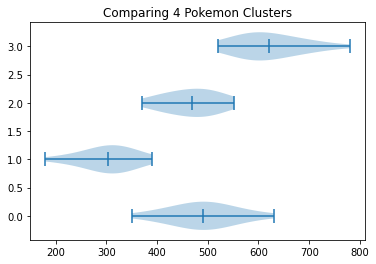

In [7]:
# Visualizing 'TOTAL' to the 'CLUSTERS' and making a Violin Plot
import matplotlib.pyplot as plt

def fetch_clstrs(df, clstr_group):
    return df[df['Cluster'] == clstr_group]

clstrs = [0, 1, 2, 3]
grp = [fetch_clstrs(df, x) for x in clstrs]
array = [a['Total'].values for a in grp]
fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_title('Comparing 4 Pokemon Clusters')
ax.violinplot(array, [0, 1, 2, 3], vert=False, points=120, widths=0.5, showmeans=True, showextrema=True, showmedians=False, bw_method=0.9);


🧠 **Bonus Question: Why you chose this data to plot? Why did you represent it in this particular way?**

💡 ***Answer:*** Well, the `Total` column values are most likely based on some balanced comparative relation between all the other listed stats to get a *Total Value* which is written there. I represented it in the form of a Violin Plot it is an easy, simple and quite aesthetic way of plotting data.

## Problem 4

We have shown differences in the cluster average statistics with a beautiful graph. Now, we want to visualize the cluster assignments of ALL of the data. However, we have six "stats" columns, and even the world of pokemon is only three dimensional... Prepare for trouble, and make it double, it's time for dimensionality reduction!

💪 **Task: Reduce the dimensions of the pokemon dataset using PCA. Store the principal components in a NumPy `ndarray` called `components`. The unit test will call a `.plot_PCA()` method to display the data points, and their color coded cluster assignments.**   
Pro-tip 1: You should only use the numerical columns: `Attack`, `Defense`, `Sp. Atk`, `Sp. Def`, `Speed`, and `HP`.   
Pro-tip 2: Think of how many dimensions you must reduce the dataset to, so that we are able to visualize it. It's the same as we did in class!  
Pro-tip 3: Please use the `random_state=42` argument when constructing your sklearn class, to make sure your results are reproducible. Marks won't be taken off for using the wrong random seed, but the unit tests won't pass!  
Pro-tip 4: We have seen in lectures that sklearn expects NumPy `ndarrays` as argument to its training and prediction methods. Whilst that is true, it can also accept pandas `DataFrames` directly, since these are `ndarray` wrappers. You can use whichever you prefer.  
Pro-tip 5: The `plot_PCA()` method uses the `y_kmeans` predictions to pick marker colors. Make sure you have finished problem 1 and run the cells to make it available here.


In [8]:
from sklearn.decomposition import PCA
pca = PCA()

# Reusing our 'STATS' dataframe and putting it through NumPy to make it into 'NDARRAY'
array2 = stats.to_numpy()
array2[0].shape

#Considering our array is already in a '6x1' dimensional system.
mydata = np.stack(array2)

#Training our PCA Model now.
pca.fit(mydata)

#Reducing our data to 2D.
pca = PCA(n_components=2)
pca.fit(mydata)
components = pca.transform(mydata)

#Checking the Dimensions.
len(components[0])

2

Success! 🎉


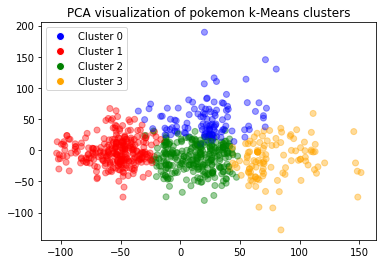

In [9]:
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

def plot_PCA(components):
    # assign a color to each prediction
    colors = ['blue', 'red', 'green', 'orange']
    features_colors = [colors[y] for y in y_kmeans]

    # plot the PCA components
    fig = plt.figure()
    ax = fig.add_subplot('111')
    ax.scatter(components[:, 0], components[:, 1],
                c=features_colors, marker='o',
                alpha=0.4)
    
    ax.set_title('PCA visualization of pokemon k-Means clusters')

    legends = [legend(i, c) for i, c in enumerate(colors)]
    ax.legend(handles=legends, loc='upper left')
    
    plt.show()

def legend(i, color):
    return Line2D([0], [0], marker='o', color='w', label=f'Cluster {i}',markerfacecolor=color, markersize=8)

def test_pca():
    rows, columns = components.shape
    assert columns == 2, f'Your components have {columns} dimensions. In order to visualise the data, we expect 2 dimensions.'
    assert rows == 800, f'Your components have {rows} data points, but 800 are expected, one per pokemon.'
    assert math.isclose(components[42, 1], -18.321118, rel_tol=1e-5), f'Something is not quite right with your dimensional reduction. Have you used a random seed of 42?'
    print('Success! 🎉')
    plot_PCA(components)
    
test_pca()

🧠 **Bonus Question: Do you think this matches the results of problem 2? Why? What do the 2 principal axes seem to represent?**

💡 ***Answer:*** Yes, it does. The PCA visualisation places these points in almost very similar axes and with the same clusters groups in their designated places. The 2 principle axes seem to explain the relationship of the clusters with each other.

## Problem 5

An Old man once told you how to catch Weedles. 🐛 But he also said that winning battles comes down to unique fighting styles. We want to find the pokemons that stand out the most from the rest.

💪 **Task: Use gaussian distribution anomaly detection to identify the top 1% of most unique pokemons. Use the resulting predictions vector to filter our `df` `DataFrame`, and save the outlier pokemons in a new `DataFrame` called `outliers`.**   
Pro-tip 1: You should only use the numerical columns: `Attack`, `Defense`, `Sp. Atk`, `Sp. Def`, `Speed`, and `HP`.   
Pro-tip 2: Adding a `Outlier` column to `df` will allow you to work on a single DataFrame and make the task much easier 🙃  
Pro-tip 3: Please use the `random_state=42` argument when constructing your sklearn class, to make sure your results are reproducible. Marks won't be taken off for using the wrong random seed, but the unit tests won't pass!  
Pro-tip 4: We have seen in lectures that sklearn expects NumPy ndarrays as argument to its training and prediction methods. Whilst that is true, it can also accept pandas DataFrames directly, since these are ndarray wrappers. So use whichever you prefer.  
Pro-tip 5: Remember that the `contamination` argument changes the percentage of our dataset we expect to be outliers.


In [10]:
from sklearn.covariance import EllipticEnvelope

# Reusing our 'STATS' dataframe and putting it through NumPy to make it into 'NDARRAY'
array3 = stats.to_numpy()
array3[0].shape

(6,)

In [11]:
#Considering our array is already in a '6x1' dimensional system.
moredata = np.stack(array3)

#Training our Gaussian Distr. Anomaly Detection algorithm with 'CONTAMINATION = 1%'
gaussiandist = EllipticEnvelope(random_state=42, contamination = 0.01).fit(moredata)

#Using it to predict the outliers in our data.
prediction = gaussiandist.predict(moredata)
prediction

#Now to iterate through our 'ARRAY3' to find the 'OUTLIERS' that we need.
outlier = []

for x in range(0, len(array3)):
    if prediction[x] == -1:
        outlier.append(array3[x])
len(outlier)

8

In [12]:
outlier #HP 	Attack 	Defense 	Sp. Atk 	Sp. Def 	Speed

[array([ 50,  95, 180,  85,  45,  70]),
 array([250,   5,   5,  35, 105,  50]),
 array([ 75,  85, 200,  55,  65,  30]),
 array([ 75, 125, 230,  55,  95,  30]),
 array([ 20,  10, 230,  10, 230,   5]),
 array([255,  10,  10,  75, 135,  55]),
 array([ 70, 140, 230,  60,  80,  50]),
 array([ 95, 117, 184,  44,  46,  28])]

In [13]:
#Generated Result/Output is a list so converting it into dataframe 'OUTLIERS'.
o1 = pd.DataFrame(outlier)

#Renaming Columns as per Original 'STATS' dataframe for easy filtering.
o1.columns = ['HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed']
o1

,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed
0,50,95,180,85,45,70
1,250,5,5,35,105,50
2,75,85,200,55,65,30
3,75,125,230,55,95,30
4,20,10,230,10,230,5
5,255,10,10,75,135,55
6,70,140,230,60,80,50
7,95,117,184,44,46,28


In [14]:
outliers = df[df['HP'].isin(o1['HP']) & df['Attack'].isin(o1['Attack']) & df['Defense'].isin(o1['Defense']) & df['Sp. Atk'].isin(o1['Sp. Atk']) & df['Sp. Def'].isin(o1['Sp. Def']) & df['Speed'].isin(o1['Speed'])]
outliers

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Cluster
98,91,Cloyster,Water,Ice,525,50,95,180,85,45,70,1,False,0
121,113,Chansey,Normal,NaN,450,250,5,5,35,105,50,1,False,2
223,208,Steelix,Steel,Ground,510,75,85,200,55,65,30,2,False,0
224,208,SteelixMega Steelix,Steel,Ground,610,75,125,230,55,95,30,2,False,0
230,213,Shuckle,Bug,Rock,505,20,10,230,10,230,5,2,False,0
261,242,Blissey,Normal,NaN,540,255,10,10,75,135,55,2,False,2
333,306,AggronMega Aggron,Steel,NaN,630,70,140,230,60,80,50,3,False,0
789,713,Avalugg,Ice,NaN,514,95,117,184,44,46,28,6,False,0


In [15]:
def test_anomaly_detection():
    assert len(outliers) == 8, f'You found {len(outliers)} outliers, but we expected 800 * 1% = 8' 
    assert outliers['Total'].sum() == 4284, f'Something is not quite right with your anomaly detection. Have you used a random seed of 42?'
    print('Success! 🎉')
    return outliers
    
test_anomaly_detection()

Success! 🎉


,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Cluster
98,91,Cloyster,Water,Ice,525,50,95,180,85,45,70,1,False,0
121,113,Chansey,Normal,NaN,450,250,5,5,35,105,50,1,False,2
223,208,Steelix,Steel,Ground,510,75,85,200,55,65,30,2,False,0
224,208,SteelixMega Steelix,Steel,Ground,610,75,125,230,55,95,30,2,False,0
230,213,Shuckle,Bug,Rock,505,20,10,230,10,230,5,2,False,0
261,242,Blissey,Normal,NaN,540,255,10,10,75,135,55,2,False,2
333,306,AggronMega Aggron,Steel,NaN,630,70,140,230,60,80,50,3,False,0
789,713,Avalugg,Ice,NaN,514,95,117,184,44,46,28,6,False,0


### Method Version 2

In [25]:
df['Outlier'] = False
arrayconstone = np.ones([len(array3)])

for n in range (0,len(array3)):
    if arrayconstone[n] != prediction[n]:
        df.loc[n, ['Outlier']] = True
        
outliers = df.loc[df['Outlier'] == True]

In [26]:
def test_anomaly_detection():
    assert len(outliers) == 8, f'You found {len(outliers)} outliers, but we expected 800 * 1% = 8' 
    assert outliers['Total'].sum() == 4284, f'Something is not quite right with your anomaly detection. Have you used a random seed of 42?'
    print('Success! 🎉')
    return outliers
    
test_anomaly_detection()

Success! 🎉


,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Cluster,Outlier
98,91,Cloyster,Water,Ice,525,50,95,180,85,45,70,1,False,0,True
121,113,Chansey,Normal,NaN,450,250,5,5,35,105,50,1,False,2,True
223,208,Steelix,Steel,Ground,510,75,85,200,55,65,30,2,False,0,True
224,208,SteelixMega Steelix,Steel,Ground,610,75,125,230,55,95,30,2,False,0,True
230,213,Shuckle,Bug,Rock,505,20,10,230,10,230,5,2,False,0,True
261,242,Blissey,Normal,NaN,540,255,10,10,75,135,55,2,False,2,True
333,306,AggronMega Aggron,Steel,NaN,630,70,140,230,60,80,50,3,False,0,True
789,713,Avalugg,Ice,NaN,514,95,117,184,44,46,28,6,False,0,True


🧠 **Bonus Question: Is this what you expected? Can you explain why these pokemons are outliers? Can you spot a pattern?**

💡 ***Answer:*** Yes, it was expected. These Pokemon have some stats which do not match to the other stat values present in these Pokemons. That's the noted pattern, large values for some stats while some very small values for some integral stats to make them worthy and balanced.